# Proyecto final: Asignatura Visión por Computador

## Aplicación de técnicas de visión por computador para el entrenamiento de un modelo de reconocimiento de patrones

Integrantes y documentos:

*   Diego Eusse Naranjo - 1037655233
*   Juan Mauricio Herrera Duran - 1128453482
*   Rafael Arturo Matallana Lozano - 1017248867
*   Juan David Ramírez Sánchez -

## **1. Metodología a implementar**

<p align = "justify"> Para el desarrollo del presente ejercicio, se seguirá el siguiente orden: </p>

- Origen y descripción del dataset

- Modelamiento de Datos

- Preprocesamiento de imágenes

- Segmentación de imágenes

- Extracción de características

- Reconocimiento de patrones

- Análisis de resultados

- Presentación de Conclusiones

## **2. Origen y descipción del dataset**

Se realiza un estudio inicial sobre las características estadísticas del dataset, su origen, cantidad de imágenes, tamaño de las imágenes, usos del dataset,  lo que permite conocer al dataset de una manera más clara.

Para la realización de este proyecto, cada uno de los miembros realizó una búsqueda inicial de datasets de imágenes para reconocimiento de patrones dentro de los repositorios recomendados por el profesor, con un énfasis especial en la plataforma Kaggle (https://www.kaggle.com/datasets) y cada uno seleccionó un conjunto de ellos que fuese de gusto o interés personal.

Posteriormente se realizó una elección entre todos los miembros del grupo y se escogió el dataset denominado 'Chessman image dataset: For chess lover in data science', una colección de imágenes de las diferentes piezas del clásico juego ajedrez, desarollado por Nitesh Yadav, a quien damos crédito, quien es un estudiante (Msc. Computer Science) en la University of Delhi, India, quien además dice ser un amante del ajedrez y de la ciencia de datos, por lo cual se tomó el trabajo de realizar esta colección de diferentes imágenes, obtenidas desde internet o desde su propia captura. Su perfil puede visualizarse en: https://www.kaggle.com/niteshfre 

Este dataset contiene imágenes de las diferentes piezas del juego tradicional ajedrez, en diferentes condiciones. Se trata de una colección de 552 imágenes de piezas como: Alfil, Rey, Reina, Caballo, Peón y Torre. Este dataset fue posteado alrededor de hace 2 años, por lo que se asume que pertenece al año 2019.

A continuación se muestran algunas especificaciones y características del dataset escogido:

### **Link del dataset original**

https://www.kaggle.com/niteshfre/chessman-image-dataset

### **Algunas características generales**

* Este dataset contiene imágenes de diferentes piezas del ajedrez, de 6 clases diferentes:  Alfil, Rey, Reina, Caballo, Peón y Torre.

* El formato de las imágenes varía entre los formatos '.jpg' y '.png', también se verificará.

* El dataset cuenta con imágenes de un ancho máximo de  4443 px * alto máximo de 8000 px, acá se encontrarán cuáles son aquellas imágenes de mayor dimensión para cada clase.

* El dataset es ideal para trabajar y entrenar modelos de clasificación, detección y segmentación de objetos en imágenes.

### **Importamos librerías necesarias**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imutils import paths
import pandas as pd
import numpy as np 
import imutils
import cv2
import os
import glob
import random
import matplotlib.pyplot as plt
import os
import zipfile
import math
from PIL import Image
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


### Clases en el dataset

In [106]:
ls Chess

 Volume in drive C is Windows
 Volume Serial Number is DEA9-6257

 Directory of C:\Users\diego.eusse\Desktop\IA\2Semestre\VisionComputador\Proyecto\Chess

09/12/2021  04:12 p.ÿm.    <DIR>          .
09/12/2021  04:12 p.ÿm.    <DIR>          ..
09/12/2021  11:50 a.ÿm.    <DIR>          Bishop
09/12/2021  11:50 a.ÿm.    <DIR>          King
09/12/2021  01:24 p.ÿm.    <DIR>          Knight
09/12/2021  04:12 p.ÿm.    <DIR>          output
09/12/2021  11:50 a.ÿm.    <DIR>          Pawn
09/12/2021  11:50 a.ÿm.    <DIR>          Queen
09/12/2021  11:50 a.ÿm.    <DIR>          Rook
               0 File(s)              0 bytes
               9 Dir(s)  59.698.184.192 bytes free


Se observa que el dataset cuenta con 6 clases: Bishop(Alfil), King(Rey), Knight(Caballo), Pawn(Peón), Queen(Reina) y Rook(Torre). 

### Creación de directorios

In [109]:
# Creamos rutas para los datos
# Ruta general
base_dir = 'Chess'

# Sub rutas
Bishop = base_dir + '/Bishop'
King = base_dir + '/King'
Knight = base_dir + '/Knight'
Pawn = base_dir + '/Pawn'
Queen = base_dir + '/Queen'
Rook = base_dir + '/Rook'

directories = [Bishop, King, Knight, Pawn, Queen, Rook]

### Cantidad de imágenes

In [110]:
total = 0
for directory in directories:
    list = os.listdir(directory)
    number_files = len(list)
    total += number_files
    print('La carpeta ' + directory + ' tiene un total de ' + repr(number_files) + ' imágenes.')
print('Con lo que se tiene un total de ' + repr(total) + ' imágenes.')

La carpeta Chess/Bishop tiene un total de 87 imágenes.
La carpeta Chess/King tiene un total de 75 imágenes.
La carpeta Chess/Knight tiene un total de 105 imágenes.
La carpeta Chess/Pawn tiene un total de 106 imágenes.
La carpeta Chess/Queen tiene un total de 77 imágenes.
La carpeta Chess/Rook tiene un total de 102 imágenes.
Con lo que se tiene un total de 552 imágenes.


### **Formato de las imágenes**

In [111]:
formatos = []
for directorio in directories:
    for image in os.listdir(directorio):
        formato = Image.open(directorio + '/' + image).format
        formatos.append(formato)

formatos = set(formatos)
print(formatos)

{'JPEG', 'PNG'}


### Tamaño de las imágenes (análisis global)

In [112]:
max_width = 0
max_height = 0
max_width_file = ''
max_height_file = ''
max_width_folder = ''
max_height_folder = ''

for directorio in directories:
    for image in os.listdir(directorio):
        width, height = Image.open(directorio + '/' + image).size
        if width > max_width:
            max_width = width
            max_width_file = image
            max_width_folder = directorio
            
        if height > max_height:
            max_height = height
            max_height_file = image
            max_height_folder = directorio
        
print('Las dimensiones máximas encontradas son: ' + repr(max_width) + ' pixeles de ancho, y ' + repr(max_height) + ' pixeles de alto.')
print('Los archivos con estas dimensiones máximas son: ' + max_width_folder + '/' + max_width_file + ' (Ancho) y ' + max_height_folder + '/' + max_height_file + ' (Alto).')

Las dimensiones máximas encontradas son: 4443 pixeles de ancho, y 8000 pixeles de alto.
Los archivos con estas dimensiones máximas son: Chess/Pawn/00000015.png (Ancho) y Chess/King/00000027.png (Alto).


### Tamaño de las imágenes (por clase)

In [113]:
for directorio in directories:
    max_width = 0
    max_height = 0
    max_width_file = ''
    max_height_file = ''
    for image in os.listdir(directorio):
        
        width, height = Image.open(directorio + '/' + image).size
        if width > max_width:
            max_width = width
            max_width_file = image
            
        if height > max_height:
            max_height = height
            max_height_file = image
    print('Directorio: ' + directorio)
    print('Dimensiones máximas: ' + repr(max_width) + ' (Ancho), ' + repr(max_height) + ' (Alto).')
    print('Archivos con dimensiones máximas: ' + max_width_file + ' (Ancho) y ' + max_height_file + ' (Alto).')
    print('\n')

Directorio: Chess/Bishop
Dimensiones máximas: 2453 (Ancho), 3183 (Alto).
Archivos con dimensiones máximas: 00000016.jpg (Ancho) y 00000017.jpg (Alto).


Directorio: Chess/King
Dimensiones máximas: 4000 (Ancho), 8000 (Alto).
Archivos con dimensiones máximas: 00000045.jpg (Ancho) y 00000027.png (Alto).


Directorio: Chess/Knight
Dimensiones máximas: 2500 (Ancho), 3180 (Alto).
Archivos con dimensiones máximas: 00000001.jpg (Ancho) y 00000010.JPG (Alto).


Directorio: Chess/Pawn
Dimensiones máximas: 4443 (Ancho), 8000 (Alto).
Archivos con dimensiones máximas: 00000015.png (Ancho) y 00000015.png (Alto).


Directorio: Chess/Queen
Dimensiones máximas: 4000 (Ancho), 4000 (Alto).
Archivos con dimensiones máximas: 00000011.jpg (Ancho) y 00000011.jpg (Alto).


Directorio: Chess/Rook
Dimensiones máximas: 2244 (Ancho), 2043 (Alto).
Archivos con dimensiones máximas: 00000005.jpg (Ancho) y 00000003.JPG (Alto).




## **3. Modelamiento de datos**

Una vez se tiene un conocimiento general de las características del dataset, se procede a realizar un modelamiento de datos. En esta sección se busca organizar y dividir al conjunto de datos entre conjuntos de entrenamiento (train) y validación, para posteriormente utilizarlos en la implementación del modelo. Se trabajará con un 70% de las imágenes para entrenamiento, un 20% para validación y un 10% para testeo del modelo final. Esta división puede realizarse por medio de las librerías de keras-tensorflow o también mediante la librería split-folders:

### **Utilizando Keras-Tensorflow:**

In [114]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *

Creación del conjunto de entrenamiento:

In [116]:
image_size = (256, 256)
batch = 32

train = keras.preprocessing.image_dataset_from_directory(
    'Chess/',
    validation_split=.3,
    subset='training',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 552 files belonging to 6 classes.
Using 387 files for training.


Creación del conjunto de validación:

In [117]:
validation = keras.preprocessing.image_dataset_from_directory(
    'Chess/',
    validation_split=.2,
    subset='validation',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 552 files belonging to 6 classes.
Using 110 files for validation.


Creación del conjunto de testeo final:

In [118]:
test = keras.preprocessing.image_dataset_from_directory(
    'Chess/',
    validation_split=.1,
    subset='validation',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 552 files belonging to 6 classes.
Using 55 files for validation.


Función para mostrar algunas imágenes de cierto dataset:

In [119]:
def display_samples(dataset, n_samples, classes_name):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(n_samples):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(classes_name[np.argmax(labels[i])])
            plt.axis("off")

Mostrar algunas imágenes del conjunto de entrenamiento:

(256, 256, 3)


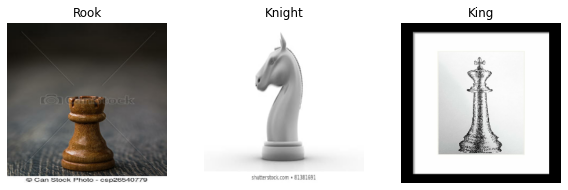

In [120]:
display_samples(train, 3, train.class_names)
for images, labels in train.take(1):
        for i in range(1):
            print(images[i].shape)

Mostrar algunas imágenes del conjunto de validación:

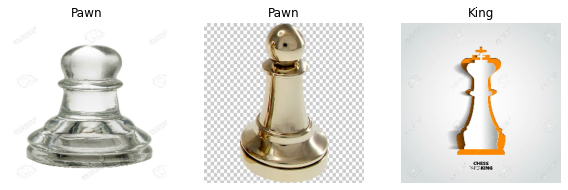

In [121]:
display_samples(validation, 3, validation.class_names)

Mostrar algunas imágenes del conjunto de testeo:

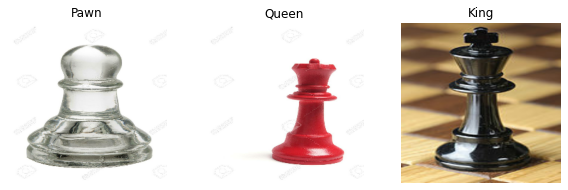

In [122]:
display_samples(test, 3, test.class_names)

### **Utilizando la librería split-folders:**

In [76]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


Se toman los conjuntos de imágenes para cada una de las piezas del ajedrez: Bishop, King, Knight, Pawn, Queen, Rook y se genera un nuevo directorio 'ouput', donde se almacenarán 3 subdirectorios adicionales, correspondientes a los conjuntos de entrenamiento, validación y testeo, respectivamente. Se utiliza una división del 70% para entrenamiento, 20% para validación y 10% para testeo.

In [123]:
import splitfolders
splitfolders.ratio(base_dir, output="Chess/output", seed=1234, ratio=(0.7, 0.2, 0.1))

Copying files: 552 files [00:04, 122.04 files/s]


Se verifica la carpeta 'output':

In [124]:
ls Chess\output

 Volume in drive C is Windows
 Volume Serial Number is DEA9-6257

 Directory of C:\Users\diego.eusse\Desktop\IA\2Semestre\VisionComputador\Proyecto\Chess\output

09/12/2021  05:16 p.ÿm.    <DIR>          .
09/12/2021  05:16 p.ÿm.    <DIR>          ..
09/12/2021  05:16 p.ÿm.    <DIR>          test
09/12/2021  05:16 p.ÿm.    <DIR>          train
09/12/2021  05:16 p.ÿm.    <DIR>          val
               0 File(s)              0 bytes
               5 Dir(s)  59.600.478.208 bytes free


### Funciones generales a utilizar en el procesamiento de imágenes:

In [169]:
def image_to_feature_vector(image, size=(128, 128)):
    # Convirtiendo imagen a un tamaño fijo y luego la aplanamos
    return cv2.resize(image, size).flatten()

def extract_color_histogram(image, bins=(8, 8, 8)):
  # Convertimos a HSV y obtenemos un histograma
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
        [0, 180, 0, 256, 0, 256])
    # Normalizamos hist
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    else:
        cv2.normalize(hist, hist)
    return hist.flatten()

### Generación de conjuntos de entrenamiento, validación y testeo con clases mezcladas, manteniendo las etiquetas de cada una de las imágenes:

Se actualizan rutas para los datos:

In [152]:
# Ruta general
base_dir = 'Chess/output/'

# Sub rutas
train_dir = base_dir + 'train/'
val_dir = base_dir + 'val/'
test_dir = base_dir + 'test/'

# Classes -> Bishop, King, Knight, Pawn, Queen, Rook

# Rutas entrenamiento por clases
train_bishop_dir = train_dir + 'Bishop'
train_king_dir = train_dir + 'King'
train_knight_dir = train_dir + 'Knight'
train_pawn_dir = train_dir + 'Pawn'
train_queen_dir = train_dir + 'Queen'
train_rook_dir = train_dir + 'Rook'

# Rutas validacion por clases
val_bishop_dir = val_dir + 'Bishop'
val_king_dir = val_dir + 'King'
val_knight_dir = val_dir + 'Knight'
val_pawn_dir = val_dir + 'Pawn'
val_queen_dir = val_dir + 'Queen'
val_rook_dir = val_dir + 'Rook'

# Rutas testeo por clases
test_bishop_dir = test_dir + 'Bishop'
test_king_dir = test_dir + 'King'
test_knight_dir = test_dir + 'Knight'
test_pawn_dir = test_dir + 'Pawn'
test_queen_dir = test_dir + 'Queen'
test_rook_dir = test_dir + 'Rook'

Se mezclan todos 'paths' de las diferentes clases para la creación de los datasets mezclados de entrenamiento, validación y testeo:

In [153]:
# Número de 'classes' en este caso vecinos para el algoritmo en como queremos agrupar
neighbors = 6
SEED = 42
root_dir = 'C:/Users/diego.eusse/Desktop/IA/2Semestre/VisionComputador/Proyecto/'

# Creamos un solo conjunto de datos entrenamiento combinando rutas de grapes y strawberries
# organizamos aleatoriamente # Classes -> Bishop, King, Knight, Pawn, Queen, Rook
data_bishop = glob.glob(root_dir + train_bishop_dir + '/*')
data_king = glob.glob(root_dir + train_king_dir + '/*')
data_knight = glob.glob(root_dir + train_knight_dir + '/*')
data_queen = glob.glob(root_dir + train_queen_dir + '/*')
data_pawn = glob.glob(root_dir + train_pawn_dir + '/*')
data_rook = glob.glob(root_dir + train_rook_dir + '/*')
train_data_paths = data_bishop + data_king + data_knight + data_pawn + data_queen + data_rook
random.shuffle(train_data_paths)

# Creamos un solo conjunto de datos de validación combinando rutas de grapes y strawberries
# organizamos aleatoriamente
val_bishop = glob.glob(root_dir + val_bishop_dir + '/*')
val_king = glob.glob(root_dir + val_king_dir + '/*')
val_knight = glob.glob(root_dir + val_knight_dir + '/*')
val_queen = glob.glob(root_dir + val_queen_dir + '/*')
val_pawn = glob.glob(root_dir + val_pawn_dir + '/*')
val_rook = glob.glob(root_dir + val_rook_dir + '/*')
val_data_paths = val_bishop + val_king + val_knight + val_pawn + val_queen + val_rook
random.shuffle(val_data_paths)

# Creamos un solo conjunto de datos testing combinando rutas de grapes y strawberries
# organizamos aleatoriamente
test_bishop = glob.glob(root_dir + test_bishop_dir + '/*')
test_king = glob.glob(root_dir + test_king_dir + '/*')
test_knight = glob.glob(root_dir + test_knight_dir + '/*')
test_queen = glob.glob(root_dir + test_queen_dir + '/*')
test_pawn = glob.glob(root_dir + test_pawn_dir + '/*')
test_rook = glob.glob(root_dir + test_rook_dir + '/*')
test_data_paths = test_bishop + test_king + test_knight + test_pawn + test_queen + test_rook
random.shuffle(test_data_paths)

In [154]:
print(f"Tamaño conjunto entrenamiento: {len(train_data_paths)}")
print(f"Tamaño conjunto de validación: {len(val_data_paths)}")
print(f"Tamaño conjunto testeo: {len(test_data_paths)}")
print(f"Tamaño total dataset: {len(train_data_paths) + len(val_data_paths) + len(test_data_paths)}")

Tamaño conjunto entrenamiento: 383
Tamaño conjunto de validación: 109
Tamaño conjunto testeo: 60
Tamaño total dataset: 552


Se genera un array con todas las imágenes de entrenamiento y otro con todos los labels de estas imágenes:

In [170]:
images = []
labels = []

for (i, imagePath) in enumerate(train_data_paths):
    # Leemos la imagen y obtenemos su etiqueta
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-2].split("/")[-1]
    
    # Obtenemos las carácteristicas de la imagen y su histograma
    pixels = image_to_feature_vector(image)
    
    # Guardamos todo en unos vectores
    images.append(pixels)
    labels.append(label)

# Convirtiendo a arrays numpy
trainImages = np.array(images)
trainLabels = np.array(labels)

In [172]:
print("Len trainImages: ", len(trainImages))
print("Len trainLabels: ", len(trainLabels))

Len trainImages:  383
Len trainLabels:  383


De manera similar, se realiza con los conjuntos de validación y testeo:

In [173]:
images = []
labels = []

for (i, imagePath) in enumerate(val_data_paths):
    # Leemos la imagen y obtenemos su etiqueta
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-2].split("/")[-1]
    
    # Obtenemos las carácteristicas de la imagen y su histograma
    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)
    
    # Guardamos todo en unos vectores
    images.append(pixels)
    labels.append(label)

# Convirtiendo a arrays numpy
validationImages = np.array(images)
validationLabels = np.array(labels)

In [174]:
print("Len validationImages: ", len(validationImages))
print("Len validationLabels: ", len(validationLabels))

Len validationImages:  109
Len validationLabels:  109


In [175]:
images = []
labels = []

for (i, imagePath) in enumerate(test_data_paths):
    # Leemos la imagen y obtenemos su etiqueta
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-2].split("/")[-1]
    
    # Obtenemos las carácteristicas de la imagen y su histograma
    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)
    
    # Guardamos todo en unos vectores
    images.append(pixels)
    labels.append(label)

# Convirtiendo a arrays numpy
testImages = np.array(images)
testLabels = np.array(labels)

In [176]:
print("Len testImages: ", len(testImages))
print("Len testLabels: ", len(testLabels))

Len testImages:  60
Len testLabels:  60


## **4. Preprocesamiento de imágenes**


En esta sección se toman algunas de las imágenes y se intenta predecir el pre-procesamiento general que se debe aplicar a las imágenes del dataset antes de la construcción del modelo. Se toma inicialmente una de las imágenes del conjunto de entrenamiento:

In [161]:
trainImages[0].shape

(49152,)

Se hace un reshape para observar la imagen original:

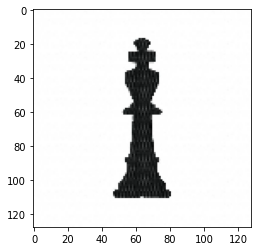

In [166]:
res = np.reshape(trainImages[0], (128, 128, 3))
plt.imshow(res)

## **5. Segmentación de imágenes**


## **6. Extracción de características**


## **7. Reconocimiento de patrones**
Se plantean 3 modelos de aprendizaje de máquinas, sobre los cuales se hace un ajuste de hiperparámetros individualmente, con base en los datos de testeo. Al final de cada modelo, se presentan las métricas al evaluar los datos del subconjunto de validación.

## **8. Análisis de resultados**
En esta sección se resumen los resultados obtenidos por todos los modelos de Aprendizaje de máquinas y se selecciona el modelo que presente mejores resultados según los requisitos del problema.

## **9. Conclusiones**
Al final del trabajo, se exponen y justifican los resultados obtenidos.